In [249]:
!jupyter nbconvert --to html /content/Utilizing_Machine_Learning_to_Predict_Customer_Priority_for_Loan_Approval.ipynb


[NbConvertApp] Converting notebook /content/Utilizing_Machine_Learning_to_Predict_Customer_Priority_for_Loan_Approval.ipynb to html
[NbConvertApp] Writing 1004076 bytes to /content/Utilizing_Machine_Learning_to_Predict_Customer_Priority_for_Loan_Approval.html


**Problem Statement**<br>We have Customers data and given those data we want to predict



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [140]:
a1 = pd.read_excel("/content/drive/MyDrive/Credit risk modelling/case_study1.xlsx")
a2 = pd.read_excel("/content/drive/MyDrive/Credit risk modelling/case_study2.xlsx")


In [175]:
df1 = a1.copy()
df2 = a2.copy()

In [176]:
df2.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [178]:
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [179]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

In [180]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [181]:
df2 = df2.drop(columns_to_be_removed, axis =1)

for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [182]:
df2.columns

Index(['PROSPECTID', 'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m',
       'enq_L3m', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER',
       'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_Flag',
       'PL_Flag', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag',
       'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', '

In [183]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [184]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [185]:
df.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12

In [186]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [187]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)


MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


Since all the categorical features have pval <=0.05, we will accept all

In [188]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)


In [189]:
df.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12

In [190]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [191]:
len(numeric_columns)

72

In [204]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]

In [205]:
vif_data.shape

(42064, 72)

In [206]:
total_columns

72

In [195]:
len(list(vif_data.columns))

72

In [207]:
vif_data.shape

(42064, 72)

In [202]:
vif_data.iloc[:,44].head()

0    0
1    0
2    0
3    0
4    0
Name: GL_Flag, dtype: int64

In [250]:
columns_to_be_kept = []
# column_index = 0
for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, i)
    print (numeric_columns[i],'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        # column_index = column_index+1

    # else:
    #     vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Total_TL --- inf
Tot_Closed_TL --- inf
Tot_Active_TL --- inf
Total_TL_opened_L6M --- 8.386094184170583
Tot_TL_closed_L6M --- 6.822916488054288
pct_tl_open_L6M --- 5.344199901464055
pct_tl_closed_L6M --- 4.223442800730588
pct_active_tl --- inf
pct_closed_tl --- 1788.95771490895
Total_TL_opened_L12M --- 15.200137933469819
Tot_TL_closed_L12M --- 9.04461770639665
pct_tl_open_L12M --- 4.010090259815417
pct_tl_closed_L12M --- 4.946701307359741
Tot_Missed_Pmnt --- 2.320169553908582
Auto_TL --- inf
CC_TL --- inf
Consumer_TL --- inf
Gold_TL --- inf
Home_TL --- inf
PL_TL --- inf
Secured_TL --- inf
Unsecured_TL --- inf
Other_TL --- inf
Age_Oldest_TL --- 3.996658973882458
Age_Newest_TL --- 3.941328103385365
time_since_recent_payment --- 2.735596362883497
num_times_delinquent --- 6.961314467465793
max_recent_level_of_deliq --- 4.938757627655762
num_deliq_6mts --- inf
num_deliq_12mts --- inf
num_deliq_6_12mts --- inf
num_times_30p_dpd --- 12.754547497478866
num_times_60p_dpd --- 7.664123029753485
nu

In [209]:
columns_to_be_kept

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_lss',
 'recent_level_of_deliq',
 'time_since_recent_enq',
 'AGE',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_opened_TLs_L6m_of_L12m',
 'pct_currentBal_all_TL',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'Credit_Score']

Here we haven't appplied t-test because output column have 4 categories

In [210]:
# check Anova for columns_to_be_kept

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)


feature selection is done for cat and num features


In [211]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [212]:
df.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_sub', 'num_sub_6mts', 'num_sub_12mts',
       'num_dbt', 'num_lss', 'recent_level_of_deliq', 'time_since_recent_enq',
       'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr',
       'pct_opened_TLs_L6m_of_L12m', 'CC_Flag', 'PL_Flag', 'HL_Flag',
       'GL_Flag', 'Credit_Score', 'MARITALSTATUS', 'EDUCATION', 'GENDER',
       'last_prod_enq2', 'first_prod_enq2', 'Approved_Flag'],
      dtype='object')

In [63]:
# Encoding for the categorical features
# ['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

In [213]:
df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

Only education is a candidate for label encoding. so <br># Ordinal feature --<br> EDUCATION<br>
SSC            : 1<br>
12TH           : 2<br>
GRADUATE       : 3<br>
UNDER GRADUATE : 3<br>
POST-GRADUATE  : 4<br>
OTHERS         : 1<br>
PROFESSIONAL   : 3


In [214]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [215]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pct_tl_open_L6M             42064 non-null  float64
 1   pct_tl_closed_L6M           42064 non-null  float64
 2   pct_tl_open_L12M            42064 non-null  float64
 3   pct_tl_closed_L12M          42064 non-null  float64
 4   Tot_Missed_Pmnt             42064 non-null  int64  
 5   Age_Oldest_TL               42064 non-null  int64  
 6   Age_Newest_TL               42064 non-null  int64  
 7   time_since_recent_payment   42064 non-null  int64  
 8   max_recent_level_of_deliq   42064 non-null  int64  
 9   num_sub                     42064 non-null  int64  
 10  num_sub_6mts                42064 non-null  int64  
 11  num_sub_12mts               42064 non-null  int64  
 12  num_dbt                     42064 non-null  int64  
 13  num_lss                     420

In [216]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   pct_tl_open_L12M              42064 non-null  float64
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   Age_Oldest_TL                 42064 non-null  int64  
 6   Age_Newest_TL                 42064 non-null  int64  
 7   time_since_recent_payment     42064 non-null  int64  
 8   max_recent_level_of_deliq     42064 non-null  int64  
 9   num_sub                       42064 non-null  int64  
 10  num_sub_6mts                  42064 non-null  int64  
 11  num_sub_12mts                 42064 non-null  int64  
 12  num_dbt                       42064 non-null  int64  
 13  n

In [217]:
k = df_encoded.describe()

In [218]:
df_encoded.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_sub', 'num_sub_6mts', 'num_sub_12mts',
       'num_dbt', 'num_lss', 'recent_level_of_deliq', 'time_since_recent_enq',
       'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr',
       'pct_opened_TLs_L6m_of_L12m', 'CC_Flag', 'PL_Flag', 'HL_Flag',
       'GL_Flag', 'Credit_Score', 'EDUCATION', 'Approved_Flag',
       'MARITALSTATUS_Married', 'MARITALSTATUS_Single', 'GENDER_F', 'GENDER_M',
       'last_prod_enq2_AL', 'last_prod_enq2_CC', 'last_prod_enq2_ConsumerLoan',
       'last_prod_enq2_HL', 'last_prod_enq2_PL', 'last_prod_enq2_others',
       'first_prod_enq2_AL', 'first_prod_enq2_CC',
       'first_prod_enq2_ConsumerLoan', 'first_prod_enq2_HL',
       'first_prod_enq2_PL', 'first_prod_enq2_others'],
      dtype='object')

Base line model fitting

In [221]:
# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

In [222]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.9902531796029954

Class p1:
Precision: 0.9375582479030755
Recall: 0.9921104536489151
F1 Score: 0.9640632486823192

Class p2:
Precision: 0.9986144101346002
Recall: 1.0
F1 Score: 0.9993067247697336

Class p3:
Precision: 0.9936457505957109
Recall: 0.9441509433962264
F1 Score: 0.9682662538699691

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



In [223]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [224]:

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.99

Class p1:
Precision: 0.9798792756539235
Recall: 0.960552268244576
F1 Score: 0.9701195219123506

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 0.9702602230483272
Recall: 0.9849056603773585
F1 Score: 0.9775280898876405

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



In [225]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [226]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.99

Class p1:
Precision: 0.9692765113974232
Recall: 0.9644970414201184
F1 Score: 0.966880869995057

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 0.9729323308270676
Recall: 0.9766037735849057
F1 Score: 0.974764595103578

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



xgboost is giving me best results<br>
We will further finetune it

In [227]:
# Apply standard scaler

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [228]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [229]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.99
Class p1:
Precision: 0.9798792756539235
Recall: 0.960552268244576
F1 Score: 0.9701195219123506

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 0.9702602230483272
Recall: 0.9849056603773585
F1 Score: 0.9775280898876405

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



No improvement in metrices

In [230]:
# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Test Accuracy: 0.994413407821229


We can do the same task manually as well

In [80]:
# # Define the hyperparameter grid
# param_grid = {
#   'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
#   'learning_rate'   : [0.001, 0.01, 0.1, 1],
#   'max_depth'       : [3, 5, 8, 10],
#   'alpha'           : [1, 10, 100],
#   'n_estimators'    : [10,50,100]
# }

# index = 0

# answers_grid = {
#     'combination'       :[],
#     'train_Accuracy'    :[],
#     'test_Accuracy'     :[],
#     'colsample_bytree'  :[],
#     'learning_rate'     :[],
#     'max_depth'         :[],
#     'alpha'             :[],
#     'n_estimators'      :[]

#     }


# # Loop through each combination of hyperparameters
# for colsample_bytree in param_grid['colsample_bytree']:
#   for learning_rate in param_grid['learning_rate']:
#     for max_depth in param_grid['max_depth']:
#       for alpha in param_grid['alpha']:
#           for n_estimators in param_grid['n_estimators']:

#               index = index + 1

#               # Define and train the XGBoost model
#               model = xgb.XGBClassifier(objective='multi:softmax',
#                                        num_class=4,
#                                        colsample_bytree = colsample_bytree,
#                                        learning_rate = learning_rate,
#                                        max_depth = max_depth,
#                                        alpha = alpha,
#                                        n_estimators = n_estimators)



#               y = df_encoded['Approved_Flag']
#               x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

#               label_encoder = LabelEncoder()
#               y_encoded = label_encoder.fit_transform(y)


#               x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


#               model.fit(x_train, y_train)



#               # Predict on training and testing sets
#               y_pred_train = model.predict(x_train)
#               y_pred_test = model.predict(x_test)


#               # Calculate train and test results

#               train_accuracy =  accuracy_score (y_train, y_pred_train)
#               test_accuracy  =  accuracy_score (y_test , y_pred_test)



#               # Include into the lists
#               answers_grid ['combination']   .append(index)
#               answers_grid ['train_Accuracy']    .append(train_accuracy)
#               answers_grid ['test_Accuracy']     .append(test_accuracy)
#               answers_grid ['colsample_bytree']   .append(colsample_bytree)
#               answers_grid ['learning_rate']      .append(learning_rate)
#               answers_grid ['max_depth']          .append(max_depth)
#               answers_grid ['alpha']              .append(alpha)
#               answers_grid ['n_estimators']       .append(n_estimators)


#               # Print results for this combination
#               print(f"Combination {index}")
#               print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
#               print(f"Train Accuracy: {train_accuracy:.2f}")
#               print(f"Test Accuracy : {test_accuracy :.2f}")
#               print("-" * 30)

In [246]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y=y_encoded


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [232]:
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Specify the objective for multiclass classification
    learning_rate = 0.01, max_depth= 3, n_estimators= 50
)


In [233]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [234]:
y_pred_model = model.predict(x_test)

In [235]:
y_pred_train=model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.99542
Class p1:
Precision: 0.9986673773987207
Recall: 0.9622496147919877
F1 Score: 0.9801203243526027

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 0.97166761741776
Recall: 0.9990224828934506
F1 Score: 0.9851551956815114

Class p4:
Precision: 1.0
Recall: 0.9995277449822905
F1 Score: 0.999763816721776



In [236]:
accuracy = accuracy_score(y_test, y_pred_model)
print(f'Accuracy: {accuracy:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_model)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.99441
Class p1:
Precision: 0.9989680082559339
Recall: 0.9546351084812623
F1 Score: 0.9762985375693394

Class p2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class p3:
Precision: 0.9664233576642336
Recall: 0.999245283018868
F1 Score: 0.9825602968460111

Class p4:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



In [247]:
# Perform cross-validation with appropriate metrics
cv_scores_accuracy = cross_val_score(model, x, y, cv=5, scoring='accuracy')
cv_scores_log_loss = cross_val_score(model, x, y, cv=5, scoring='neg_log_loss')
cv_scores_f1_macro = cross_val_score(model, x, y, cv=5, scoring='f1_macro')
print(f"Cross-Validation Accuracy Scores: {cv_scores_accuracy}")
print(f"Mean CV Accuracy Score: {np.mean(cv_scores_accuracy)}")
print(f"Cross-Validation Log Loss Scores: {cv_scores_log_loss}")
print(f"Mean CV Log Loss Score: {np.mean(cv_scores_log_loss)}")
print(f"Cross-Validation F1 Macro Scores: {cv_scores_f1_macro}")
print(f"Mean CV F1 Macro Score: {np.mean(cv_scores_f1_macro)}")

Cross-Validation Accuracy Scores: [0.99976227 0.99988114 0.99964341 0.992155   0.98454589]
Mean CV Accuracy Score: 0.9951975406130235
Cross-Validation Log Loss Scores: [-0.73675802 -0.73673287 -0.73609358 -0.73924791 -0.74494875]
Mean CV Log Loss Score: -0.7387562248550941
Cross-Validation F1 Macro Scores: [0.99955117 0.99978422 0.99932722 0.98506137 0.97031532]
Mean CV F1 Macro Score: 0.9908078595970643


In [248]:
# save the model
import pickle
filename = '/content/drive/MyDrive/Credit risk modelling/updated_Loan_appr_cat.sav'
pickle.dump(model, open(filename,'wb'))

In [91]:
# load_model = pickle.load(open(filename,'rb'))

Some more Experimentation


**KNN**

In [237]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

In [238]:
y_pred_knn = knn_model.predict(x_test)

In [239]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_knn)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.98348
Class p1:
Precision: 0.9583333333333334
Recall: 0.97534516765286
F1 Score: 0.9667644183773215

Class p2:
Precision: 0.9911242603550295
Recall: 0.9960356788899901
F1 Score: 0.9935739001482946

Class p3:
Precision: 0.9695074276778733
Recall: 0.9358490566037736
F1 Score: 0.9523809523809523

Class p4:
Precision: 0.9883720930232558
Recall: 0.9912536443148688
F1 Score: 0.9898107714701601



**SVM**

In [240]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [241]:
y_pred_svc = svm_model.predict(x_test)

In [242]:
accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_svc)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.92500
Class p1:
Precision: 0.9988399071925754
Recall: 0.849112426035503
F1 Score: 0.9179104477611941

Class p2:
Precision: 0.9245006413780466
Recall: 1.0
F1 Score: 0.960769377261474

Class p3:
Precision: 0.8300857365549493
Recall: 0.8037735849056604
F1 Score: 0.8167177914110428

Class p4:
Precision: 1.0
Recall: 0.7881438289601554
F1 Score: 0.8815217391304347



Check for class imbalance

In [112]:
best_params_dt = {
 'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_split': 14,
 'min_samples_leaf': 16
}
# Create and train the model
dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_classifier.fit(x_train, y_train)
# Predict and evaluate
y_pred_dt = dt_classifier.predict(x_test) # Use validation set for evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [113]:
# accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy_dt:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_dt)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.74813
Class p1:
Precision: 0.7612838515546639
Recall: 0.7485207100591716
F1 Score: 0.7548483341621085

Class p2:
Precision: 0.8108255877528704
Recall: 0.8818632309217047
F1 Score: 0.8448537789593619

Class p3:
Precision: 0.41858141858141856
Recall: 0.31622641509433963
F1 Score: 0.36027515047291486

Class p4:
Precision: 0.71875
Recall: 0.6482021379980564
F1 Score: 0.6816555952989269



In [116]:
from sklearn.model_selection import cross_val_score

In [120]:
import seaborn as sns

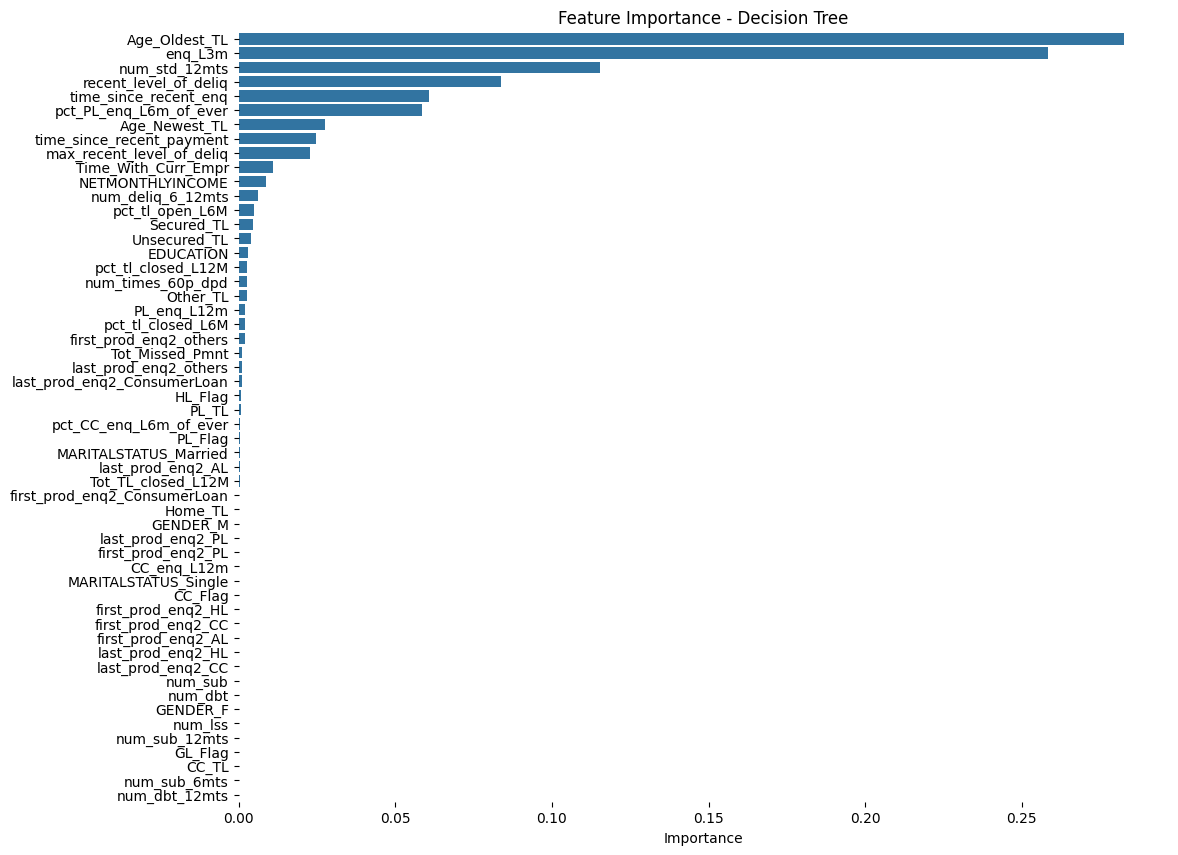

In [121]:
# Feature importances
feature_importance = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [122]:
feature_importance_df

,Feature,Importance
11,Age_Oldest_TL,0.282733
28,enq_L3m,0.258359
17,num_std_12mts,0.115294
24,recent_level_of_deliq,0.083919
27,time_since_recent_enq,0.060827
33,pct_PL_enq_L6m_of_ever,0.058572
12,Age_Newest_TL,0.027686
13,time_since_recent_payment,0.024697
14,max_recent_level_of_deliq,0.022911
30,Time_With_Curr_Empr,0.011073


**Random forest**

In [124]:
from sklearn.ensemble import RandomForestClassifier
# Best parameters for Random Forest
best_params_rf = {
'n_estimators': 744,
 'max_depth': 26,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'
}
# Create and train the model
rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
rf_classifier.fit(x_train, y_train)
# Predict and evaluate
y_pred_rf = rf_classifier.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f"Random Forest Accuracy: {accuracy_rf}")
# print(classification_report(y_val, y_pred_rf))


In [125]:
print(f'Accuracy: {accuracy_rf:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_rf)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.76501
Class p1:
Precision: 0.8386714116251482
Recall: 0.6972386587771203
F1 Score: 0.7614431879375336

Class p2:
Precision: 0.7939791456441305
Recall: 0.9357779980178395
F1 Score: 0.8590665089618779

Class p3:
Precision: 0.44727891156462585
Recall: 0.19849056603773585
F1 Score: 0.2749607945635128

Class p4:
Precision: 0.7191119691119691
Recall: 0.7240038872691934
F1 Score: 0.721549636803874



In [251]:
# # Perform cross-validation with appropriate metrics
# cv_scores_accuracy = cross_val_score(rf_classifier, x, y, cv=5, scoring='accuracy')
# cv_scores_log_loss = cross_val_score(rf_classifier, x, y, cv=5, scoring='neg_log_loss')
# cv_scores_f1_macro = cross_val_score(rf_classifier, x, y, cv=5, scoring='f1_macro')
# print(f"Cross-Validation Accuracy Scores: {cv_scores_accuracy}")
# print(f"Mean CV Accuracy Score: {np.mean(cv_scores_accuracy)}")
# print(f"Cross-Validation Log Loss Scores: {cv_scores_log_loss}")
# print(f"Mean CV Log Loss Score: {np.mean(cv_scores_log_loss)}")
# print(f"Cross-Validation F1 Macro Scores: {cv_scores_f1_macro}")
# print(f"Mean CV F1 Macro Score: {np.mean(cv_scores_f1_macro)}")

In [ ]:
# Feature importances
feature_importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

**Light BGM**

In [129]:
from lightgbm import LGBMClassifier
# Best parameters for LightGBM
best_params_lgbm = {
 "objective": "multiclass",
 "metric": "multi_logloss",
 "verbosity": -1,
 "boosting_type": "gbdt",
 "random_state": 42,
 "num_class": 7,
 'learning_rate': 0.011978527382971352,
 'n_estimators': 509,
 'lambda_l1': 0.009715116714365276,
 'lambda_l2': 0.03853395161282091,
 'max_depth': 11,
 'colsample_bytree': 0.7364306508830605,
 'subsample': 0.9529973839959326,
 'min_child_samples': 17
}
# Create and train the model
lgbm_classifier = LGBMClassifier(**best_params_lgbm)
lgbm_classifier.fit(x_train, y_train)
# Predict and evaluate
y_pred_lgbm = lgbm_classifier.predict(x_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)


In [130]:
print(f'Accuracy: {accuracy_lgbm:.5f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_lgbm)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.77939
Class p1:
Precision: 0.8417653390742734
Recall: 0.7712031558185405
F1 Score: 0.8049408131755019

Class p2:
Precision: 0.8200070447340613
Recall: 0.9228939544103072
F1 Score: 0.8684136901986383

Class p3:
Precision: 0.46062992125984253
Recall: 0.26490566037735847
F1 Score: 0.33636799233349307

Class p4:
Precision: 0.735632183908046
Recall: 0.7463556851311953
F1 Score: 0.7409551374819103



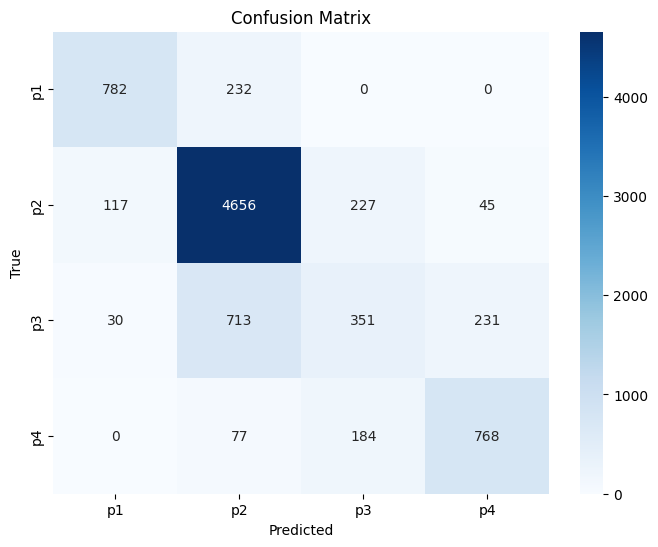

In [133]:
# prompt: code for confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are your true and predicted labels respectively
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['p1', 'p2', 'p3', 'p4'],
            yticklabels=['p1', 'p2', 'p3', 'p4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
